In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df =pd.read_csv('followers.csv')

C:\Users\HP\AppData\Local\Temp\ipykernel_7988\387943053.py:1: DtypeWarning: Columns (3,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df =pd.read_csv('followers.csv')


In [3]:
df

,created_at,description,entities,id,location,name,profile_image_url,public_metrics,username,withheld,following
0,2022-08-24 17:45:57+00:00,Found different beаuties from аll US stаtes 🙀\...,{'description': {'urls': [{'display_url': 'wq....,1562496375262412800.0,"Hialeah, FL",Fiona Brooks,https://pbs.twimg.com/profile_images/156454892...,"{'followers_count': 1, 'following_count': 144,...",FionaybBrooks,NaN,['1050792505']
1,2012-09-21 14:35:23+00:00,"""yani bir aynanın önünde yürür gibi\nayna bitt...",NaN,837919194.0,NaN,ender ondes,https://pbs.twimg.com/profile_images/574879995...,"{'followers_count': 5654, 'following_count': 2...",enderondes,NaN,['1050792505']
2,2022-02-02 18:01:43+00:00,Bahsin yeni adresi 👇\n50 TL deneme bonusu 🔥\nH...,{'url': {'urls': [{'display_url': 'rebrand.ly/...,1488935597972594688.0,NaN,Betist,https://pbs.twimg.com/profile_images/148902393...,"{'followers_count': 642, 'following_count': 25...",betist2022,NaN,['1050792505']
3,2010-10-04 23:15:47+00:00,"Macera değil, yaşamak, sade yaşamak\n\nDört Me...",{'url': {'urls': [{'display_url': 'mehtapsokak...,198673057.0,NaN,deniz faruk zeren,https://pbs.twimg.com/profile_images/155983642...,"{'followers_count': 1781, 'following_count': 1...",mehtapsokakno1,NaN,['1050792505']
4,2019-05-31 16:37:15+00:00,"🥂Hayat gerçekten basit, ama biz bunu karmaşık ...",NaN,1134499087951302784.0,"Cologne, Germany",Cenk Bora 🇹🇷,https://pbs.twimg.com/profile_images/153918865...,"{'followers_count': 2281, 'following_count': 1...",BuzunprensiTR,NaN,['1050792505']
...,...,...,...,...,...,...,...,...,...,...,...
81961,2009-03-28 16:18:44+00:00,Prof. Inclusive Education @ THUAS. Research wi...,"{'url': {'urls': [{'display_url': 'duara.org',...",27255834.0,The Netherlands,"Naomi van Stapele, she/they",https://pbs.twimg.com/profile_images/129602008...,"{'followers_count': 2531, 'following_count': 2...",Naomi2908,NaN,['1058065991308058624']
81962,2012-02-21 14:59:37+00:00,"Postie, born Liverpool. Evertonian, ex Lab mem...",NaN,498897993.0,NaN,John Molyneux,https://pbs.twimg.com/profile_images/150007504...,"{'followers_count': 1493, 'following_count': 2...",bluejohn68,NaN,['1058065991308058624']
81963,2012-08-24 08:06:49+00:00,"Shaun, homeless at 16 addicted to Heroin, dead...",NaN,777678606.0,UK,SakrRuth🇵🇸 🟨🟥 #StayAlertToToryBullshit 3.5 💙,https://pbs.twimg.com/profile_images/144971075...,"{'followers_count': 5791, 'following_count': 6...",SakrRuth,NaN,['1058065991308058624']
81964,2018-07-11 12:46:34+00:00,A social justice movement that our aim is orga...,NaN,1.01702736628625e+18,"Nairobi, Kenya",Mukuru Community Justice Centre,https://pbs.twimg.com/profile_images/103345173...,"{'followers_count': 2377, 'following_count': 5...",mukuru_cjc,NaN,['1058065991308058624']


In [4]:
location_counts = df['location'].value_counts()

In [5]:
location_counts

location
United States            1040
USA                       471
United Kingdom            319
London, England           296
Canada                    289
                         ... 
World - Switzerland         1
California and Hawaii       1
Midwest                     1
London and Worldwide        1
Lower Kabete, Nairobi       1
Name: count, Length: 22529, dtype: int64

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


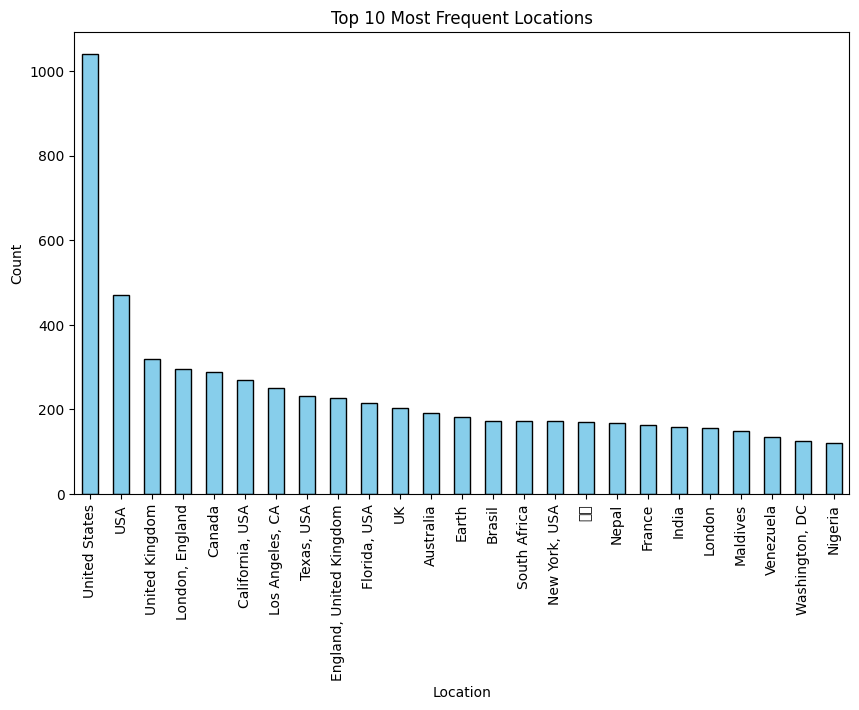

In [6]:
# Select the top 10 most frequent countries
top_10_locations = location_counts.head(25)

# Plotting the histogram for the top 10
plt.figure(figsize=(10, 6))
top_10_locations.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Top 10 Most Frequent Locations')

# Show the plot
plt.show()

In [8]:
import ast

In [12]:
# Convert the string representation of dictionaries to actual dictionaries
df.dropna(subset=['public_metrics'], inplace=True)
df['public_metrics'] = df['public_metrics'].apply(ast.literal_eval)

# Drop rows with NaN values in 'public_metrics'

# Extract values into new columns, handling None values and replacing them with zeros
df['followers'] = df['public_metrics'].apply(lambda x: x.get('followers_count', 0) if x else 0)
df['followings'] = df['public_metrics'].apply(lambda x: x.get('following_count', 0) if x else 0)
df['tweets_count'] = df['public_metrics'].apply(lambda x: x.get('tweet_count', 0) if x else 0)


In [14]:

# Find the name with the most followers
name_with_most_followers = df.loc[df['followers'].idxmax(), 'name']

# Display the result
print(f"The name with the most followers is: {name_with_most_followers}")

The name with the most followers is: John Cena


In [16]:

# Get the top 20 records based on 'followers_count' along with 'Name'
top_20_followers = df.nlargest(20, 'followers')[['name', 'followers']]

# Display the result
print(top_20_followers)

                                              name  followers
32303                                    John Cena   13901033
7679        GRUPO VÍTIMAS UNIDAS JUNTO COM LULA 13    5779394
21778                US Department of the Interior    4978612
15420                                 Ben Landis 🔍    2915531
38516                                 Ali Spagnola    2405737
21659  SHOCK G FOREVER @HUMPTYFUNK #SHOCKG #HUMPTY    2291180
78991                            Karabo Mokgoko 🦄🌞    2290096
13289                                 Ferhat Göçer    2196465
13207                                İslami Sözler    2140008
24334                        Madhu Purnima Kishwar    1984241
62580                                Arshad Sharif    1942481
16617                               Miguel H Otero    1897973
13227                                حمود اللحيدان    1866871
23112                              Jorge Arreaza M    1831850
15183                                Susan Bennett    1830006
62516   

In [18]:

# Get the top 20 records based on 'followeing_count' along with 'Name'
top_20_followers = df.nlargest(20, 'followings')[['name', 'followings']]

# Display the result
print(top_20_followers)

                                              name  followings
21659  SHOCK G FOREVER @HUMPTYFUNK #SHOCKG #HUMPTY     2737908
78991                            Karabo Mokgoko 🦄🌞     2262575
13227                                حمود اللحيدان     1634955
15420                                 Ben Landis 🔍     1551788
28767                            Etienne Arsenault     1489259
15183                                Susan Bennett     1488961
24097                      Harjinder Singh Kukreja     1435384
38516                                 Ali Spagnola     1422527
239                               DJ KING ASSASSIN     1394932
15359                              Murray Newlands     1192254
13351                                        Nadir     1140354
16617                               Miguel H Otero     1081260
13354                                    Ata Benli     1059353
13207                                İslami Sözler     1031434
24115                                  Reportero24     

In [20]:

# Get the top 20 records based on 'followeing_count' along with 'Name'
top_20_counts = df.nlargest(20, 'tweets_count')[['name', 'tweets_count']]

# Display the result
print(top_20_counts)

                                         name  tweets_count
75912                                  DC2NET       2382038
23875                            Lecturas 24H       2220501
77308                     Real Marsha Wright®       2166719
61636               Ramy Abdeljabbar 🐱🐶🇺🇸🇵🇸☪️       2033937
43080                                M LeMont       1984065
38669                                Chris 🇺🇸       1798999
69387                                      EE       1543454
18926                             @_LaAlameda       1505894
3812                        Chance and Choice       1470418
74312      Rebeca Briceño #FreeAlexSaab 🇻🇪 🇷🇺       1403995
6823           IgenLMT @EnkiVzla 🇪🇸 🇻🇪 🇲🇽 🇬🇧       1400377
36978                                 Alberto       1389414
38830                        Everyday Holiday       1371264
19893                            Kurt Hanson💎       1362736
13312                      Paul Quibell-smith       1305573
55975             Nabil H The Peacemaker